<a href="https://colab.research.google.com/github/kushal2022/OpenCV/blob/main/Open_Cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Open CV
1. Installation & setup
2. Loading an Image
3. Displaying an Image
4. Resizing an Image
5. Rotating an Image

In [1]:
!pip install opencv-python

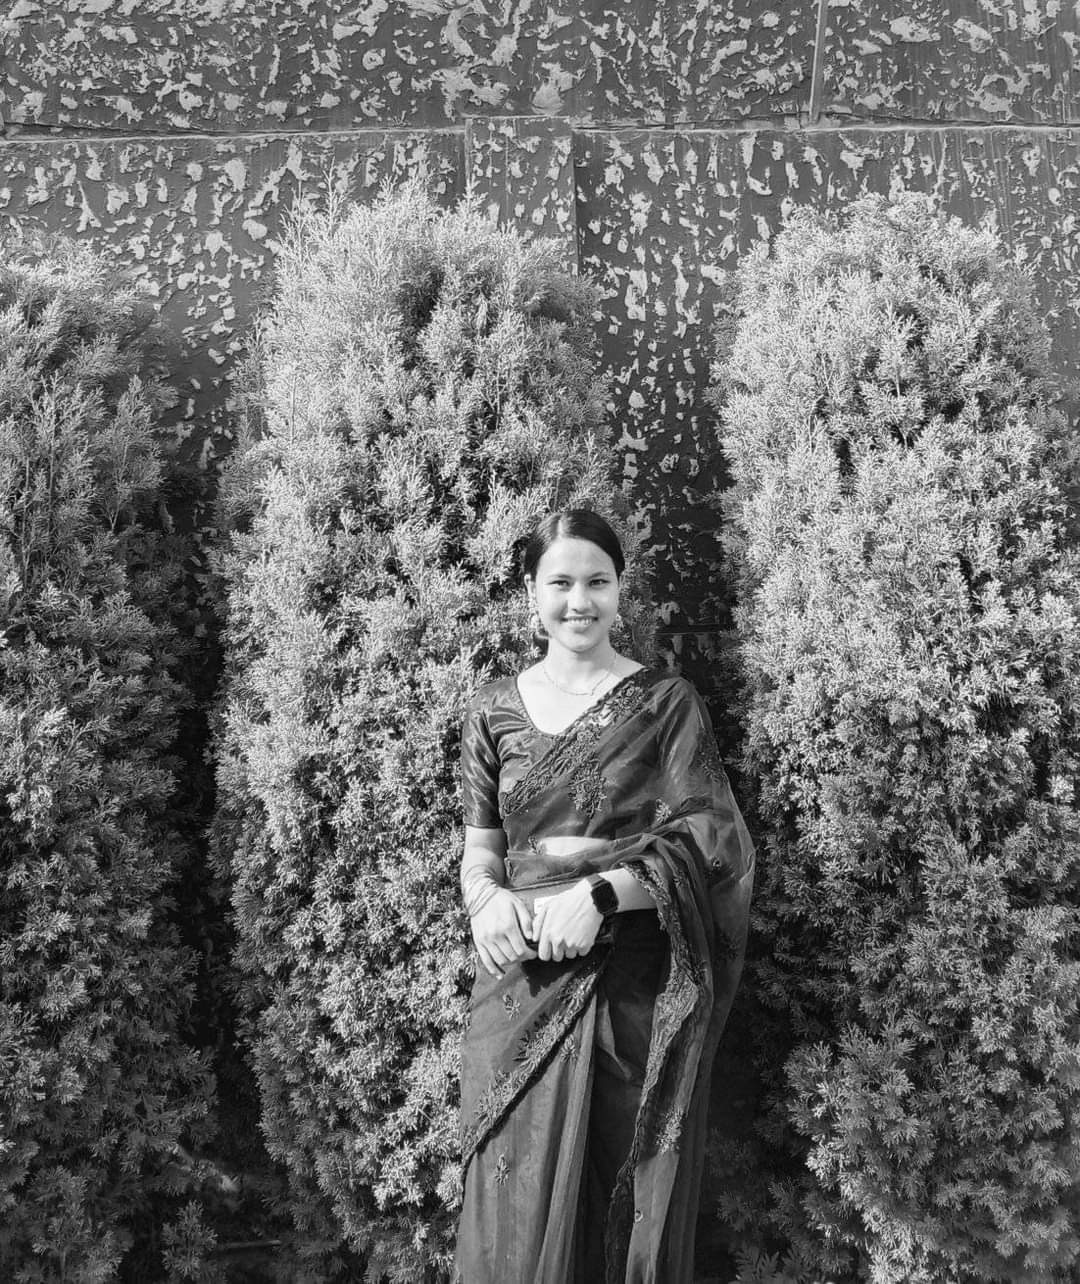

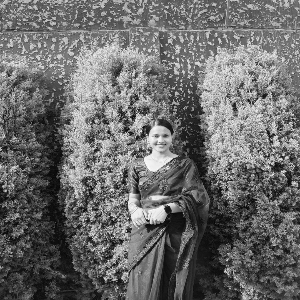

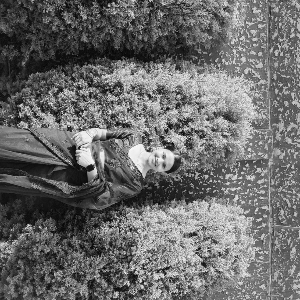

True

In [24]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('sample_data/laxmi.jpeg', 0)
cv2_imshow(img)
img = cv2.resize(img, (300, 300))
cv2_imshow(img)
img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
cv2_imshow(img)
cv2.imwrite('sample_data/laxmi_new.jpeg', img)

# Image Fundamentals and Manipulation

In [53]:
img = cv2.imread('sample_data/laxmi.jpeg', 1)
print(img.shape)
print(img.size)
print(img.dtype)

(1284, 1080, 3)
4160160
uint8


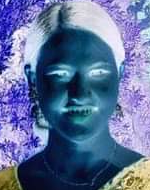

In [59]:
head = img[510:700, 500:650]
cv2_imshow(head)

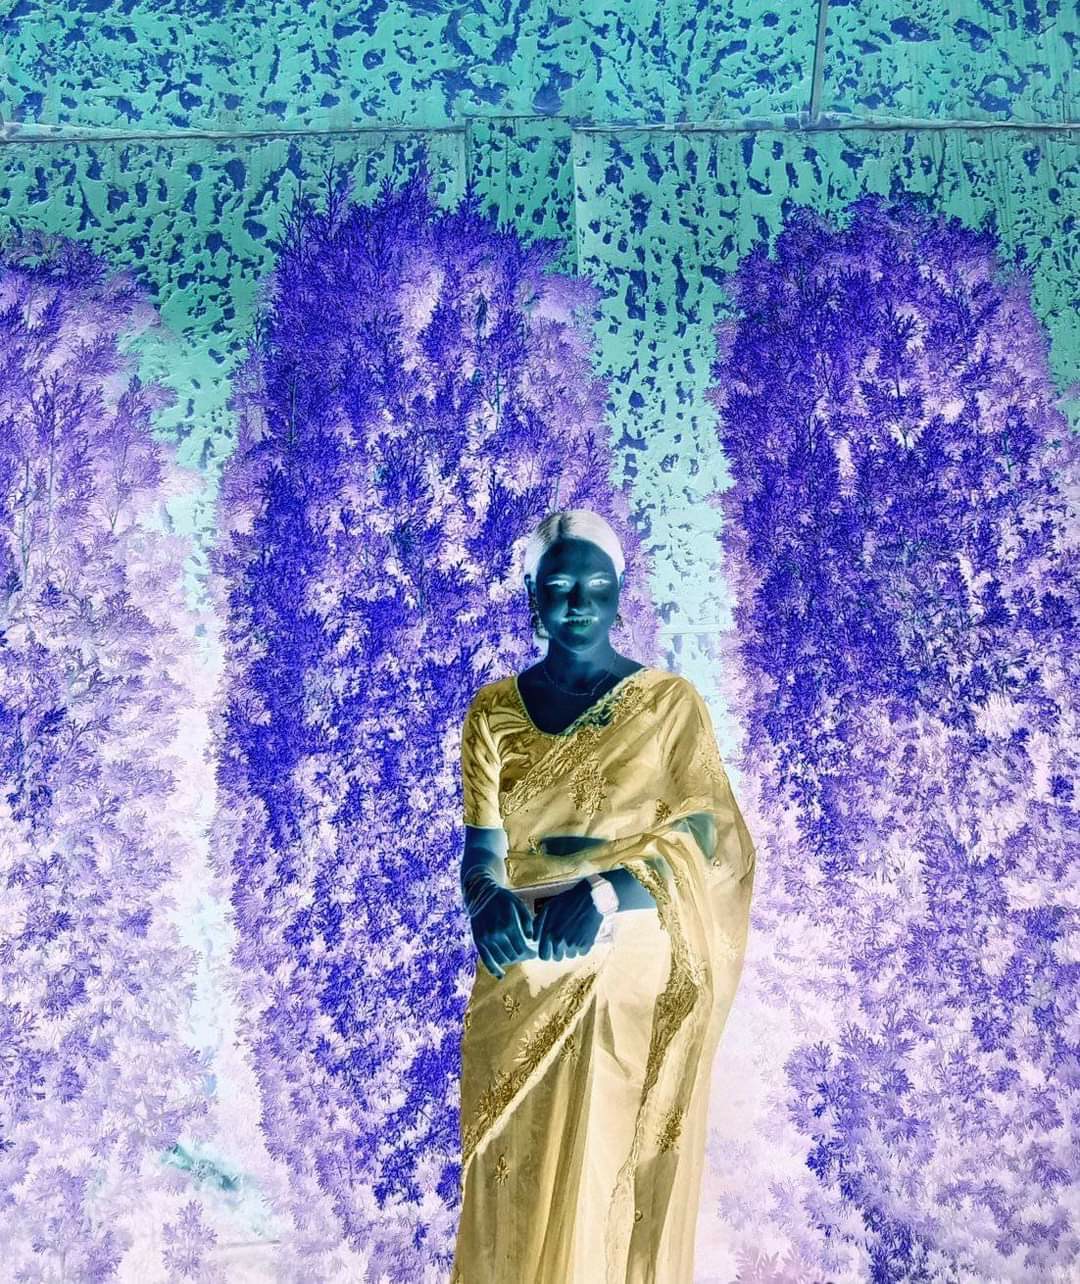

In [58]:
 for i in range(1284):
  for j in range(1080):
    img[i, j] = 255 - img[i, j]
cv2_imshow(img)

# Cameras and Video Capture

In [66]:
import numpy as np
import cv2

cap = cv2.VideoCapture(1)  # Try changing the index to 1 or other available camera indices if you have multiple cameras

while(True):
    ret, frame = cap.read()
    width = int(cap.get(3))
    height = int(cap.get(4))


    image = np.zeros(frame.shape, np.uint8)
    smaller_frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)
    image[:height//2, :width//2] = smaller_frame
    image[height//2:, :width//2] = smaller_frame
    image[:height//2, width//2:] = smaller_frame
    image[height//2:, width//2:] = smaller_frame


    # Check if frame is successfully captured
    if ret:
        cv2.imshow('frame', image)
        if cv2.waitKey(1)  == ord('q'):
            break
    else:
        print("Error: Could not capture frame.")
        break  # Exit loop if frame capture fails

cap.release()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'

# Color Detection and Colors in Opencv

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(1)  # Try changing the index to 1 or other available camera indices if you have multiple cameras

while(True):
    ret, frame = cap.read()
    width = int(cap.get(3))
    height = int(cap.get(4))

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([90, 50, 50])
    upper_blue = np.array([130, 255, 255])

    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    result = cv2.bitwise_and(frame, frame, mask=mask)

    # Check if frame is successfully captured
    if ret:
        cv2.imshow('frame', result)
        if cv2.waitKey(1)  == ord('q'):
            break
    else:
        print("Error: Could not capture frame.")
        break  # Exit loop if frame capture fails

cap.release()
cv2.destroyAllWindows()

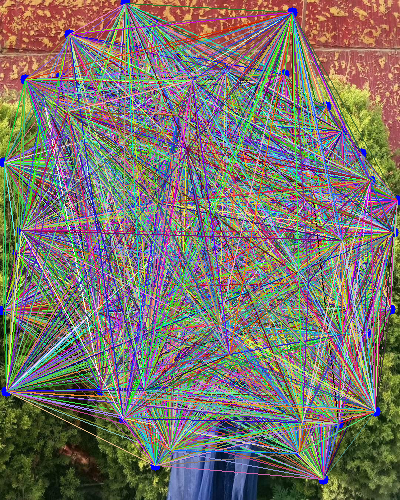

In [84]:
import numpy as np
import cv2

img = cv2.imread('sample_data/laxmi.jpeg', 1)
img = cv2.resize(img, (400, 500))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#cornor detection algoright
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 20)

corners = np.int_(corners)

for corner in corners:
  x, y = corner.ravel()
  cv2.circle(img, (x, y), 5, (255, 0, 0), -1)

for i in range(len(corners)):
  for j in range(i + 1, len(corners)):
    corner1 = tuple(corners[i][0])
    corner2 = tuple(corners[j][0])
    color = tuple(map(lambda x : int(x), np.random.randint(0, 255, size=3)))
    cv2.line(img, corner1, corner2, color, 1)

cv2_imshow(img)